## <u><b> 시계열 데이터 예측하기 - 시계열 데이터 기초
**참고: https://bit.ly/3kXXvRS** <br/>
> <b>시계열 데이터 시각화 함수 <br/>
    경향성을 갖는 시계열 데이터 <br/>
    계절성을 갖는 시계열 데이터 <br/>
    노이즈를 갖는 시계열 데이터 <br/>
    자기상관성을 갖는 시계열 데이터 <br/>

### <b>시계열 데이터 시각화 함수</b>
`plot_seires()` 함수는 임의의 시간 값(time), 시계열 데이터(series)를 입력받아 Matplotlib 그래프로 나타내는 함수다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

### <b> 경향성을 갖는 시계열 데이터 </b>
`trend()` 함수는 경향성을 갖는 시계열 데이터를 반환한다. <br/>
<b>slope</b> 값에 따라서 시간에 따라 양의 경향서, 음의 경향성을 가질 수 있다. <br/>
아래 코드에는, 4*365+1의 시간 동안 시간에 따라 0.1의 기울기를 갖는 시계열 데이터를 생성하는 코드이다. 

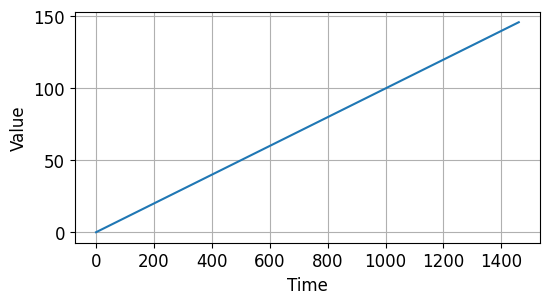

In [2]:
def trend(time, slope=0):
    return slope * time

time = np.arange(4 * 365 + 1)
series = trend(time, slope=0.1)

plot_series(time, series)
plt.show()

### <b> 계절성을 갖는 시계열 데이터 </b>
`seasonal_pattern()` 함수는 입력 <b> season_time </b>에 대해서 0.6보다 작은 경우에는 <br/> `np.cos(season_time * 2 * np.pi)` 값을, <br/>
그렇지 않은 경우에는 `1 / np.exp(3 * season_time)`을 반환한다. <br/>
<br/>
`seasonality()` 함수는 주기 <b>period</b>에 대해 특정 값을 반복하는 시계열 데이터를 반환하는 함수이다.

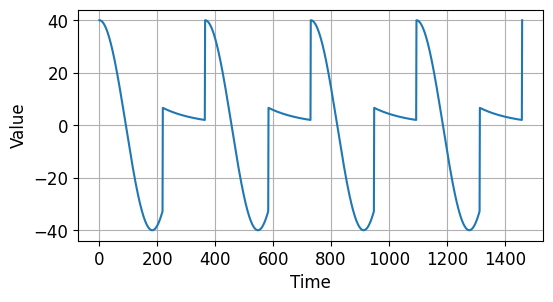

In [3]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.6,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

`trend()`, `seasonality()` 함수를 사용하여 경향성과 계절성을 모두 갖는 시계열 데이터 생성

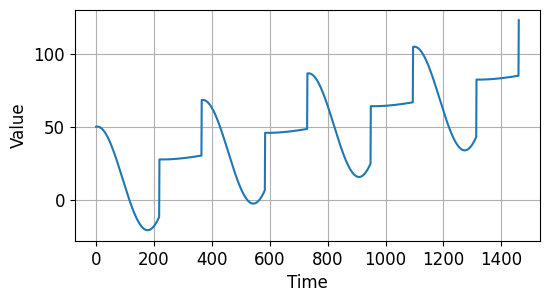

In [4]:
baseline = 10
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

### <b> 노이즈을 갖는 시계열 데이터 </b>
`white_noise()` 함수는 0에서 noise_level 값 사이의 임의의 실수를 갖는 시계열 데이터를 반환한다.

def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.rand(len(time)) * noise_level

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plot_series(time, noise)
plt.show()

경향성, 계절성, 노이즈 모두 갖는 시계열 데이터 예시

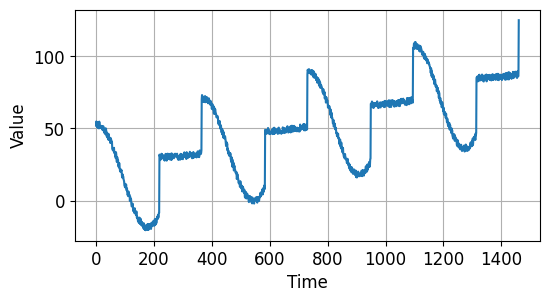

In [9]:
baseline = 10
slope = 0.05
noise_level = 5
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) \
        + white_noise(time, noise_level, seed=42)

plot_series(time, series)
plt.show()

### <b> 자기상관성을 갖는 시계열 데이터 </b>
`autocorrelation()` 함수는 자기상관성을 갖는 시계열 데이터를 반환한다. <br/>
<b> ar</b>은 정규분포를 갖는 임의의 데이터이다. <br/>
이는, 이전 시간 스탭 값의 0.8배를 더해주고 크기 <b> amplitude</b>을 곱한 시계열 데이터를 반환한다.

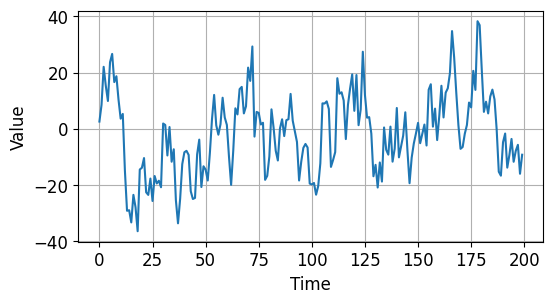

In [10]:
split_time = 1000
time_train, x_train = time[:split_time], series[:split_time]
time_valid, x_valid = time[split_time:], series[split_time:]

def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    pi = 0.8
    ar =  rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += pi * ar[step - 1]       ## 이전의 값의 0.8배를 더하기
    return ar[1:] * amplitude

series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

자기상관성과 경향성을 갖는 시계열 데이터

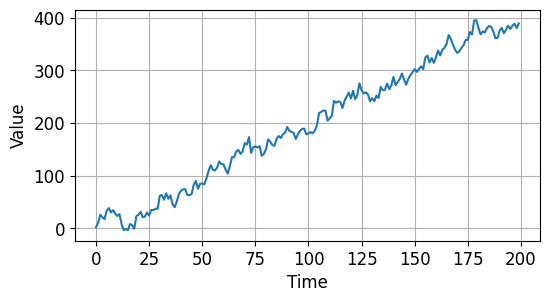

In [12]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

자기상관성과 경향성, 계절성을 갖는 시계열 데이터

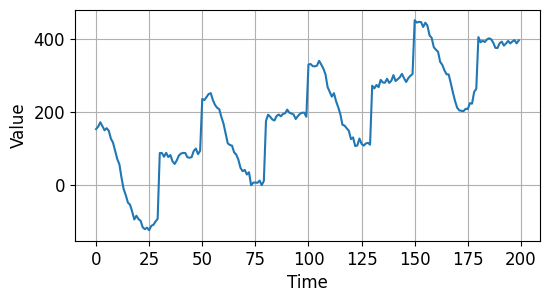

In [13]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

<b>특정 시점 이후로 다른 특성을 갖는 시계열 데이터</b> <br/>
아래 예제는 2/3 지점 이후로 크기(amplitude)와 주기(period), 경향성(slpoe)이 모두 달라진 특성을 갖는 시계열 데이터이며, 전제 구간에서 노이즈(noise) 또한 갖는다. 

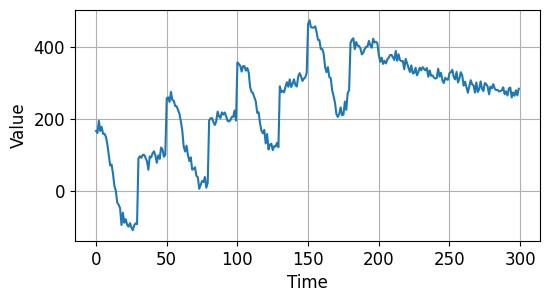

In [14]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]        # 자기상관 amp 10->5, 계절성 amp 150->2, 경향성 slope 2->-1 + 550
series += white_noise(time, 30)
plot_series(time[:300], series[:300])
plt.show()